# homogeneous poisson model

assuming in any evenly-spaced grid cell there's some number of counts $k$ generated by a Poisson process,

$p(k|\lambda) = \frac{\lambda^{k}}{k!}e^{-\lambda}$

but we only observe the cases where $k > 0$. Strategy:

* estimate Poisson intensity $\lambda$ with observed mean $\mu$
* use estimated $\lambda$ to estimate the total number of cells (observed + unobserved)

## what's the relationship between $\lambda$ and $\mu$?

The expectation value of a Poisson process is the intensity $\lambda$. So

$\lambda = E\left[\frac{\sum_{i=1}^{N}k_{i}}{N} \right]$

$\mu$ is the same number of counts but divided only by the number of observed cells $N_{obs}$

$\mu = E\left[\frac{\sum_{i=1}^{N}k_{i}}{N_{obs}} \right]$

so

$\frac{\mu}{\lambda} = E\left[\frac{N}{N_{obs}}\right] = \frac{1}{1-e^{-\lambda}}$

Solving for $\lambda$ as a function of $\mu$ is a problem since this equation is transcendental. 

## 1st order taylor approximation

Let's treat $\lambda$ as a linear correction on $\mu$ by Taylor expanding $e^{-\lambda}$ about $\mu$ to first order.

$e^{-\lambda} \approx e^{-\mu} - e^{-\mu}(\lambda - \mu)$

$\approx e^{-\mu}(1 - \lambda + \mu)$

Substituting in to the above and setting $\beta \equiv e^{-\mu}$,

$\mu(1-e^{-\lambda}) = \lambda$

$\mu(1-\beta(1 - \lambda + \mu)) = \lambda$

$\mu - \mu\beta + \mu\beta\lambda - \mu^{2}\beta = \lambda$

$\lambda(1-\mu\beta) = \mu - \mu\beta - \mu^{2}\beta$

$\lambda \approx \frac{\mu(1 - \beta - \mu\beta)}{1 - \mu\beta}$

## estimating $\hat{N}$

$N_{obs} = (1-e^{-\lambda})N$

$\hat{N} = \frac{N_{obs}}{1-e^{-\hat{\lambda}}} = N_{obs}\frac{\mu}{\hat{\lambda}}$

$\frac{\hat{N}}{N}$
$= \frac{N_{obs}}{1-e^{-\hat{\lambda}}}\frac{1-e^{-\lambda}}{N_{obs}}$


$\frac{\hat{N}}{N} = \frac{1-e^{-\lambda}}{1-e^{-\hat{\lambda}}}$

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import dask, dask.diagnostics

%matplotlib inline
from IPython.core.pylabtools import figsize

In [17]:
lam = np.linspace(0.1, 5, 100)
mu = lam/(1-np.exp(-lam))

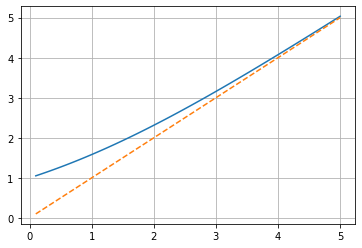

In [18]:
plt.plot(lam, mu)
plt.plot(lam, lam, "--")
#plt.xscale("log")
#plt.yscale("log")
plt.grid(True);

In [19]:
beta = np.exp(-mu)
lam_est = mu*(1 - beta - mu*beta)/(1-mu*beta)

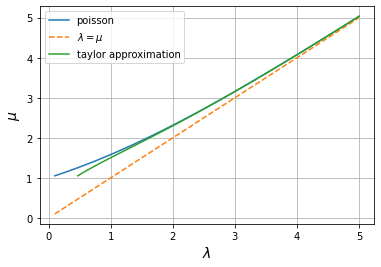

In [24]:
plt.plot(lam, mu, label="poisson")
plt.plot(lam, lam, "--", label="$\\lambda = \\mu$")
plt.plot(lam_est, mu, label="taylor approximation")
#plt.xscale("log")
#plt.yscale("log")
plt.legend(loc="upper left")
plt.xlabel("$\\lambda$", fontsize=14)
plt.ylabel("$\\mu$", fontsize=14)
plt.grid(True);

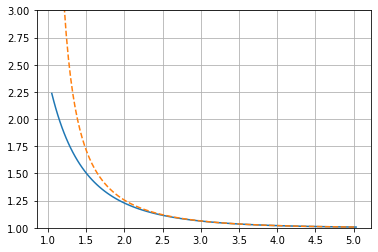

In [29]:
plt.plot(mu, mu/lam_est)
plt.plot(mu, mu/lam, "--")
plt.grid(True)
plt.ylim(1, 3);

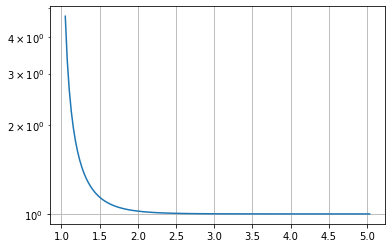

In [33]:
plt.plot(mu, lam_est/lam)
plt.yscale("log")
plt.grid(True);

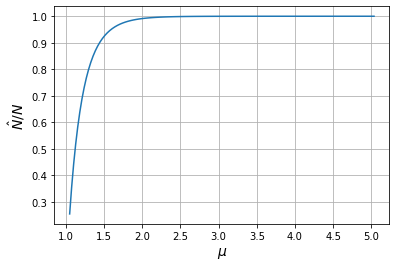

In [46]:
plt.plot(mu, (1-np.exp(-lam))/(1-np.exp(-lam_est)))
plt.ylabel("$\hat{N}/N$", fontsize=14)
plt.xlabel("$\mu$", fontsize=14)
plt.grid(True);

## second order taylor series

$e^{-\lambda} \approx e^{-\mu} - e^{-\mu}(\lambda - \mu) + \frac{1}{2}e^{-\mu}(\lambda-\mu)^{2}$

$= \frac{1}{2}e^{-\mu}\left(2 - 2\lambda + 2\mu + \lambda^{2} + \mu^{2} -2\lambda\mu \right)$

substituting

$\mu\left(1-\frac{1}{2}e^{-\mu}\left(2 - 2\lambda + 2\mu + \lambda^{2} + \mu^{2} -2\lambda\mu \right)\right) = \lambda$

$\mu - \beta\mu + \beta\mu\lambda - \beta\mu^{2} - \beta\mu\lambda^{2}/2 - \beta\mu^{3}/2 + \beta\mu^{2}\lambda = \lambda$

$\lambda^{2}(-\beta\mu/2) + \lambda(\beta\mu + \beta\mu^{2}-1) + (\mu - \beta\mu - \beta\mu^{2} - \beta\mu^{3}/2) = 0$

$a = -\beta\mu/2$

$b = \beta\mu + \beta\mu^{2} - 1$

$c = \mu - \beta\mu - \beta\mu^{2} - \beta\mu^{3}/2$

$b^{2} = \beta^{2}\mu^{2} + \beta^{2}\mu^{3} - \beta\mu $
$ + \beta^{2}\mu^{3} + \beta^{2}\mu^{4} - \beta\mu^{2}$
$ -\beta\mu - \beta\mu^{2} + 1$

$=\beta^{2}\mu^{2} + 2\beta^{2}\mu^{3} - 2\beta\mu + \beta^{2}\mu^{4} - 2\beta\mu^{2} + 1$

$4ac = -2\beta\mu^{2} + 2\beta^{2}\mu^{2} + 2\beta^{2}\mu^{3} + \beta^{2}\mu^{4}$

$b^{2} - 4ac = \beta^{2}\mu^{2} + 2\beta^{2}\mu^{3} - 2\beta\mu + \beta^{2}\mu^{4} - 2\beta\mu^{2} + 1$
$+2\beta\mu^{2} - 2\beta^{2}\mu^{2} - 2\beta^{2}\mu^{3} - \beta^{2}\mu^{4}$

$=1 - \beta^{2}\mu^{2}  -2\beta\mu$

$\lambda = \frac{-b \pm \sqrt{b^{2}-4ac}}{2a}$

$ = \frac{1-\beta\mu - \beta\mu^{2} \pm \sqrt{1-\beta^{2}\mu^{2} - 2\beta\mu}}{\beta\mu}$

$=(\beta\mu)^{-1} - 1 - \mu \pm \sqrt{(\beta\mu)^{-2} - 1 - 2(\beta\mu)^{-1}}$

In [50]:
beta = np.exp(-mu)

a = -beta*mu/2
b = beta*mu + beta*mu**2 - 1
c = mu - beta*mu - beta*mu**2 - beta*(mu**3)/2

lam_est_2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)

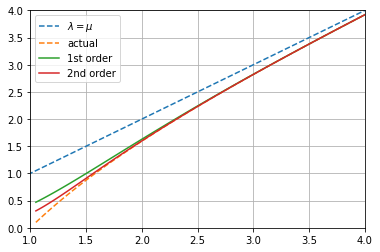

In [60]:
plt.plot(lam, lam, "--", label="$\\lambda = \\mu$")
plt.plot(mu, lam, "--", label="actual")
plt.plot(mu, lam_est, label="1st order")
plt.plot(mu, lam_est_2, label="2nd order")
plt.grid(True)
#plt.xscale("log")
#plt.yscale("log")
plt.xlim(1, 4)
plt.ylim(0, 4)
plt.legend(loc="upper left");

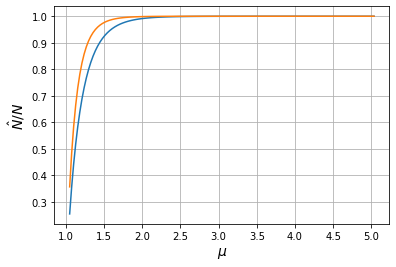

In [61]:
plt.plot(mu, (1-np.exp(-lam))/(1-np.exp(-lam_est)))
plt.plot(mu, (1-np.exp(-lam))/(1-np.exp(-lam_est_2)))
plt.ylabel("$\hat{N}/N$", fontsize=14)
plt.xlabel("$\mu$", fontsize=14)
plt.grid(True);

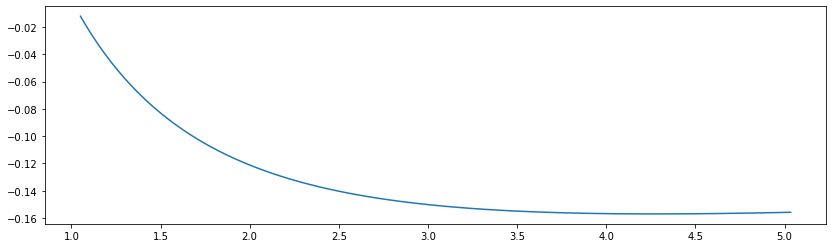

In [366]:
#lam_est_log = -1*np.log((1-np.log(mu)-mu)/(1/mu - mu))
lam_est_log = np.log(mu**2 - 1) - np.log(mu) - np.log(mu + np.log(mu) - 1)

plt.plot(mu, lam_est_log);

## how does this affect estimation of the fractal dimension?

* relative grid scale $\alpha$
* ambient and fractal dimensions $D$ and $d$
* "true" number of boxes $N_{0}$ and $N_{1}$ at finer/coarser scales, respectively
* number of constituent boxes at finer grid $\alpha^{D}N_{1}$
* $N_{0} \sim Binom(\alpha^{d-D}, \alpha^{D}N_{1})$
  * alternatively: for each true box at scale 1, there are $\alpha^{D}$ constituent grid boxes at scale 0
  * on average $\alpha^{d}$ should be occupied

In [331]:
def simulate(alpha=5, D=2, d=1.5, lam0=1., N1=100):
    thresh = 0.25
    N0 = 0
    N1_obs = 0
    N0_obs = 0
    total_count = 0

    # for each coarse-grid box
    for _ in range(N1):
        # how many ACTUAL constituent boxes should be occupied?
        num_const = np.random.binomial(alpha**D, alpha**(d-D))
        N0 += num_const
        # how many observations in each of those?
        counts = np.random.poisson(lam0, num_const)
        total_count += counts.sum()
        num_nonempty = (counts > 0).sum()
        N0_obs += num_nonempty
        N1_obs += int(num_nonempty > 0)
    
    # compute the average occupation of nonzero boxes
    mu0 = total_count/N0_obs
    mu1 = total_count/N1_obs
    # naive d estimation
    d_uncorrected = (np.log(N0_obs) - np.log(N1_obs))/np.log(alpha)
    
    # first order correction
    beta0 = np.exp(-mu0)
    lam0_est = mu0 * (1 - beta0 - mu0*beta0)/(1 - mu0*beta0)

    beta1 = np.exp(-mu1)
    lam1_est = mu1 * (1 - beta1 - mu1*beta1)/(1 - mu1*beta1)

    N0_corrected = N0_obs/(1-np.exp(-lam0_est))
    N1_corrected = N1_obs/(1-np.exp(-lam1_est))
    d_corrected = (np.log(N0_corrected) - np.log(N1_corrected))/np.log(alpha)
    
    # second-order correction
    if beta0 == 0:
        lam0_est_2 = mu0
    else:
        a0 = -beta0*mu0/2
        b0 = beta0*mu0 + beta0*mu0**2 - 1
        c0 = mu0 - beta0*mu0 - beta0*mu0**2 - beta0*(mu0**3)/2
        lam0_est_2 = (-b0-np.sqrt(b0**2-4*a0*c0))/(2*a0)
    if beta1 == 0:
        lam1_est_2 = mu1
    else:
        a1 = -beta1*mu1/2
        b1 = beta1*mu1 + beta1*mu1**2 - 1
        c1 = mu1 - beta1*mu1 - beta1*mu1**2 - beta1*(mu1**3)/2
        lam1_est_2 = (-b1-np.sqrt(b1**2-4*a1*c1))/(2*a1)
    
    N0_corrected_2 = N0_obs/(1-np.exp(-lam0_est_2))
    N1_corrected_2 = N1_obs/(1-np.exp(-lam1_est_2))
    d_corrected_2 = (np.log(N0_corrected_2) - np.log(N1_corrected_2))/np.log(alpha)
    
    if lam0 < 0.5:
        sampling = "low"
    elif lam0 < 2:
        sampling = "medium"
    else:
        sampling = "high"


    return {"alpha":alpha, "D":D, "d":d, "lam0":lam0, "N1":N1, "N0":N0, "N1_obs":N1_obs, "N0_obs":N0_obs,
           "d_uncorrected":d_uncorrected, "d_corrected":d_corrected,
            "d_corrected_2":d_corrected_2,
           "sampling":sampling,
           "error_uncorrected":d_uncorrected-d,
           "error_corrected":d_corrected-d,
           "error_corrected_2":d_corrected_2-d,
           "bad_estimate_uncorrected":np.abs(d_uncorrected-d) < thresh,
           "bad_estimate_corrected":np.abs(d_corrected-d) < thresh,
           "bad_estimate_corrected_2":np.abs(d_corrected_2-d) < thresh,
            #"a0":a0, "a1":a1, 
            "mu1":mu1
           }

In [332]:
num_simulations = 10000
#tasks = [dask.delayed(simulate)(lam0=np.random.uniform(0.1, 5), d=np.random.uniform(0.1, 2),
#                           N1=int(10**np.random.uniform(1.5,4))) for _ in tqdm(range(num_simulations))]

tasks = [dask.delayed(simulate)(lam0=10**np.random.uniform(-2,1), d=np.random.uniform(0.1, 2),
                           N1=int(10**np.random.uniform(1.5,4)), alpha=32) for _ in tqdm(range(num_simulations))]

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 12131.46it/s]


In [333]:
dask.config.set(scheduler="processes", num_workers=8)

In [334]:
with dask.diagnostics.ProgressBar():
    df = pd.DataFrame(dask.compute(*tasks))

[########################################] | 100% Completed | 53.5s


/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars
/var/folders/tq/g32vkl0n0kxgt69pzn8d3js80000gn/T/ipykernel_96356/961196778.py:54: RuntimeWarning: divide by zero encountered in double_scalars

In [335]:
df.head()

,alpha,D,d,lam0,N1,N0,N1_obs,N0_obs,d_uncorrected,d_corrected,d_corrected_2,sampling,error_uncorrected,error_corrected,error_corrected_2,bad_estimate_uncorrected,bad_estimate_corrected,bad_estimate_corrected_2,mu1
0,32,2,1.262187,8.629520,995,78885,995,78875,1.261746,1.261798,-inf,high,-0.000442,-0.000389,-inf,True,True,False,682.844221
1,32,2,1.277208,1.569226,974,81536,974,64639,1.210468,1.275510,-inf,medium,-0.066740,-0.001698,-inf,True,True,False,131.222793
2,32,2,1.127028,0.146523,4561,226972,4555,31010,0.553442,0.824941,0.91442,low,-0.573586,-0.302086,-0.212608,False,False,True,7.310867
3,32,2,1.795836,0.134613,4240,2139732,4240,269191,1.197684,1.471433,-inf,low,-0.598151,-0.324403,-inf,False,False,False,67.908019
4,32,2,0.703071,0.568186,500,5735,496,2465,0.462635,0.641972,0.67616,medium,-0.240436,-0.061099,-0.026911,True,True,True,6.532258


In [336]:
print(np.isnan(df.d_uncorrected).sum())
print(np.isnan(df.d_corrected).sum())
print(np.isnan(df.d_corrected_2).sum())

9
9
9


In [337]:
df[pd.isna(df.d_uncorrected)]

,alpha,D,d,lam0,N1,N0,N1_obs,N0_obs,d_uncorrected,d_corrected,d_corrected_2,sampling,error_uncorrected,error_corrected,error_corrected_2,bad_estimate_uncorrected,bad_estimate_corrected,bad_estimate_corrected_2,mu1
412,32,2,0.173365,0.010987,36,73,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
3822,32,2,0.351794,0.013040,43,143,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
4846,32,2,0.481528,0.018427,46,232,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
5559,32,2,0.135529,0.015646,104,155,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
5924,32,2,0.117547,0.012331,75,119,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
7913,32,2,0.102695,0.016204,102,144,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
8122,32,2,0.310736,0.011169,41,117,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
8331,32,2,0.137311,0.018068,60,103,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
8604,32,2,0.224635,0.015367,36,74,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN


In [338]:
df[pd.isna(df.d_corrected_2)]

,alpha,D,d,lam0,N1,N0,N1_obs,N0_obs,d_uncorrected,d_corrected,d_corrected_2,sampling,error_uncorrected,error_corrected,error_corrected_2,bad_estimate_uncorrected,bad_estimate_corrected,bad_estimate_corrected_2,mu1
412,32,2,0.173365,0.010987,36,73,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
3822,32,2,0.351794,0.013040,43,143,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
4846,32,2,0.481528,0.018427,46,232,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
5559,32,2,0.135529,0.015646,104,155,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
5924,32,2,0.117547,0.012331,75,119,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
7913,32,2,0.102695,0.016204,102,144,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
8122,32,2,0.310736,0.011169,41,117,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
8331,32,2,0.137311,0.018068,60,103,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN
8604,32,2,0.224635,0.015367,36,74,0,0,NaN,NaN,NaN,low,NaN,NaN,NaN,False,False,False,NaN


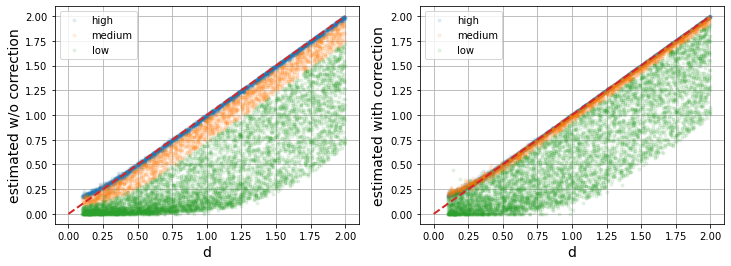

In [369]:
figsize(12,4)
plt.subplot(121)
for s in ["high", "medium", "low"]:
    plt.plot(df[df.sampling == s].d, df[df.sampling == s].d_uncorrected, ".", alpha=0.1, label=s)
plt.plot([0,df.d.max()], [0,df.d.max()], "--", lw=2)
plt.grid(True)
plt.xlabel("d", fontsize=14)
plt.ylabel("estimated w/o correction", fontsize=14)
plt.legend(loc="upper left")

plt.subplot(122)
for s in ["high", "medium", "low"]:
    plt.plot(df[df.sampling == s].d, df[df.sampling ==s].d_corrected, ".", alpha=0.1, label=s)
plt.plot([0,df.d.max()], [0,df.d.max()], "--", lw=2)
plt.xlabel("d", fontsize=14)
plt.ylabel("estimated with correction", fontsize=14)
plt.grid(True)
plt.legend(loc="upper left");

#plt.subplot(133)
#for s in ["high", "medium", "low"]:
#    plt.plot(df[df.sampling == s].d, df[df.sampling ==s].d_corrected_2, ".", alpha=0.1, label=s)
#plt.plot([0,df.d.max()], [0,df.d.max()], "--", lw=2)
#plt.xlabel("d", fontsize=14)
#plt.ylabel("estimated with correction", fontsize=14)
#plt.grid(True)
#plt.legend(loc="upper left");

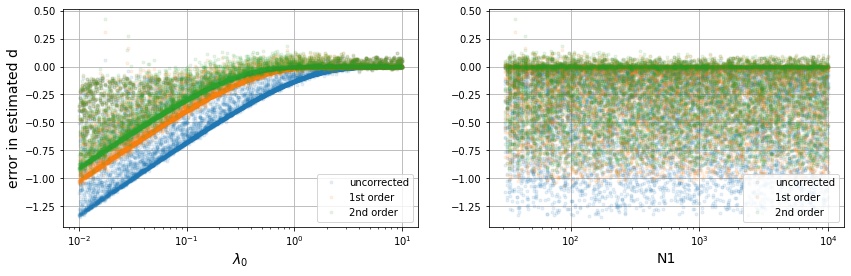

In [342]:
plt.subplot(121)
plt.plot(df.lam0, df.error_uncorrected, ".", alpha=0.1, label="uncorrected")
plt.plot(df.lam0, df.error_corrected, ".", alpha=0.1, label="1st order")
plt.plot(df.lam0, df.error_corrected_2, ".", alpha=0.1, label="2nd order")
plt.xlabel("$\lambda_{0}$", fontsize=14)
plt.ylabel("error in estimated d", fontsize=14)
plt.legend(loc="lower right")
plt.xscale("log")
plt.grid(True);

plt.subplot(122)
plt.plot(df.N1, df.error_uncorrected, ".", alpha=0.1, label="uncorrected")
plt.plot(df.N1, df.error_corrected, ".", alpha=0.1, label="1st order")
plt.plot(df.N1, df.error_corrected_2, ".", alpha=0.1, label="2nd order")
plt.xlabel("N1", fontsize=14)
#plt.ylabel("error in estimated d", fontsize=14)
plt.legend(loc="lower right")
plt.xscale("log")
plt.grid(True);

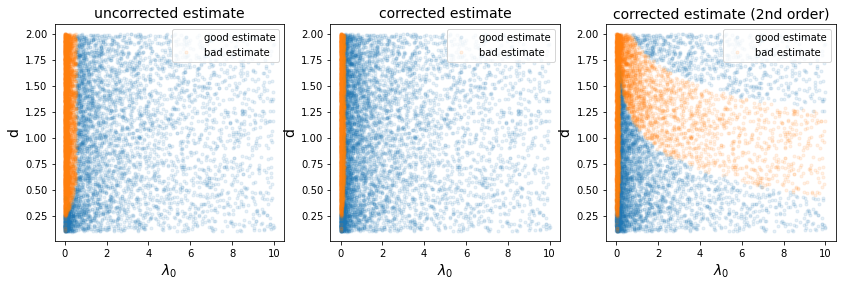

In [344]:
plt.subplot(131)
plt.plot(df[df.bad_estimate_uncorrected].lam0, df[df.bad_estimate_uncorrected].d, ".", alpha=0.1,
        label="good estimate")
plt.plot(df[~df.bad_estimate_uncorrected].lam0, df[~df.bad_estimate_uncorrected].d, ".", alpha=0.1,
        label="bad estimate")
plt.xlabel("$\lambda_{0}$", fontsize=14)
plt.ylabel("d", fontsize=14)
plt.legend(loc="upper right")
#plt.xscale("log")
plt.title("uncorrected estimate", fontsize=14);

plt.subplot(132)
plt.plot(df[df.bad_estimate_corrected].lam0, df[df.bad_estimate_corrected].d, ".", alpha=0.1,
        label="good estimate")
plt.plot(df[~df.bad_estimate_corrected].lam0, df[~df.bad_estimate_corrected].d, ".", alpha=0.1,
        label="bad estimate")
plt.xlabel("$\lambda_{0}$", fontsize=14)
plt.ylabel("d", fontsize=14)
plt.legend(loc="upper right")
#plt.xscale("log")
plt.title("corrected estimate", fontsize=14);

plt.subplot(133)
plt.plot(df[df.bad_estimate_corrected_2].lam0, df[df.bad_estimate_corrected_2].d, ".", alpha=0.1,
        label="good estimate")
plt.plot(df[~df.bad_estimate_corrected_2].lam0, df[~df.bad_estimate_corrected_2].d, ".", alpha=0.1,
        label="bad estimate")
plt.xlabel("$\lambda_{0}$", fontsize=14)
plt.ylabel("d", fontsize=14)
plt.legend(loc="upper right")
#plt.xscale("log")
plt.title("corrected estimate (2nd order)", fontsize=14);

In [348]:
df.error_corrected

0      -0.000389
1      -0.001698
2      -0.302086
3      -0.324403
4      -0.061099
          ...   
9995   -0.413066
9996   -0.273095
9997   -0.000020
9998    0.000188
9999   -0.034581
Name: error_corrected, Length: 10000, dtype: float64

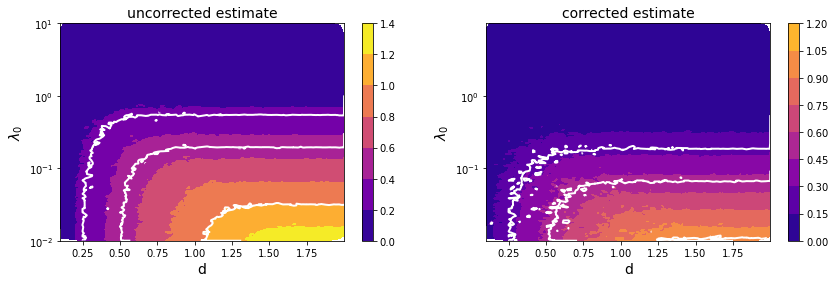

In [363]:
vmin=0
vmax = max(np.abs(df.error_uncorrected).max(), np.abs(df.error_corrected).max())
#ticks = [-1, -0.5, 0, 0.5, 1]
ticks = [-2, -1, 0, 1]
ticklabels = ["$10^{%s}$"%t for t in ticks]

df2 = df[pd.notnull(df.d_uncorrected)]

plt.subplot(121)
plt.tricontourf(df2.d, np.log10(df2.lam0), np.abs(df2.error_uncorrected), vmin=vmin, vmax=vmax, cmap="plasma")
plt.colorbar()
plt.tricontour(df2.d, np.log10(df2.lam0), np.abs(df2.error_uncorrected), levels=[0.25, 0.5,1],
              linewidths=2, colors="white")#, linestyles="dashed")
plt.yticks(ticks, ticklabels)
plt.ylabel("$\lambda_{0}$", fontsize=14)
plt.xlabel("d", fontsize=14)
plt.title("uncorrected estimate", fontsize=14);

plt.subplot(122)
plt.tricontourf(df2.d, np.log10(df2.lam0), np.abs(df2.error_corrected), vmin=vmin, vmax=vmax, cmap="plasma")
plt.yticks(ticks, ticklabels)
plt.colorbar()
plt.tricontour(df2.d, np.log10(df2.lam0), np.abs(df2.error_corrected), levels=[0.25, 0.5,1],
              linewidths=2, colors="white")#, linestyles="dashed")
plt.ylabel("$\lambda_{0}$", fontsize=14)
plt.xlabel("d", fontsize=14)
plt.title("corrected estimate", fontsize=14);

#plt.subplot(133)
#plt.tricontourf(df2.d, np.log10(df2.lam0), np.abs(df2.error_corrected_2), vmin=vmin, vmax=vmax, cmap="plasma")
#plt.yticks(ticks, ticklabels)
#plt.colorbar()
#plt.ylabel("$\lambda_{0}$", fontsize=14)
#plt.xlabel("d", fontsize=14)
#plt.title("corrected estimate", fontsize=14);

In [368]:
for l in [10, 1, 0.1, 0.01]:
    p0 = np.exp(-l)
    print(l, round(p0,2))

10 0.0
1 0.37
0.1 0.9
0.01 0.99


In [103]:
alpha = 5
D = 2
d = 1.5
lam0 = 0.5

#np.random.seed(1)
N1 = 100

N0 = 0
N1_obs = 0
N0_obs = 0
total_count = 0

# for each coarse-grid box
for _ in range(N1):
    # how many ACTUAL constituent boxes should be occupied?
    num_const = np.random.binomial(alpha**D, alpha**(d-D))
    N0 += num_const
    # how many observations in each of those?
    counts = np.random.poisson(lam0, num_const)
    total_count += counts.sum()
    num_nonempty = (counts > 0).sum()
    N0_obs += num_nonempty
    N1_obs += int(num_nonempty > 0)
    
mu0 = total_count/N0_obs
mu1 = total_count/N1_obs

$N \propto (1/\epsilon)^{d}$

$\lambda \approx \frac{\mu(1 - \beta - \mu\beta)}{1 - \mu\beta}$

In [104]:
(np.log(N0) - np.log(N1))/np.log(alpha)

1.5239654369234286

In [105]:
(np.log(N0_obs) - np.log(N1_obs))/np.log(alpha)

0.9785071269277459

In [106]:
# first order correction
beta0 = np.exp(-mu0)
lam0_est = mu0 * (1 - beta0 - mu0*beta0)/(1 - mu0*beta0)

beta1 = np.exp(-mu1)
lam1_est = mu1 * (1 - beta1 - mu1*beta1)/(1 - mu1*beta1)

N0_corrected = N0_obs/(1-np.exp(-lam0_est))
N1_corrected = N1_obs/(1-np.exp(-lam1_est))

d_corrected = (np.log(N0_corrected) - np.log(N1_corrected))/np.log(alpha)

In [107]:
print(lam0_est)
print(lam1_est)
print(d_corrected)

0.7293448879974541
6.177148507160742
1.3861871001217334
